In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
import plotly.express as px
import csv

In [2]:
#read in the data


DecWk4_Data = pd.read_csv('Picker_DecWk4_data.csv')

### NIGHT SHIFT ### 

In [4]:
#Group by day of week and user name to find the earliest start time

earliest_start_time = DecWk4_Data.groupby(['Day_of_Week', 'user_name'])['First_Pick_Started'].min().reset_index()

table_view = earliest_start_time.pivot_table(index='user_name',columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')      

table_view = table_view.fillna(0)


In [5]:
print(table_view)

Day_of_Week         1         2         3         4        5
user_name                                                   
Troy                0         0         0   8:17 AM  8:10 AM
ben                 0  10:11 PM  10:12 PM         0        0
damir               0   8:07 AM   8:25 AM   8:17 AM  8:08 AM
davidm        2:08 AM  10:22 PM  10:14 PM   8:21 PM        0
gregory             0  10:09 PM  10:13 PM  10:09 PM        0
jackr         1:32 AM         0         0   4:50 PM        0
jessek              0         0         0         0  6:53 AM
justin       12:20 AM   6:17 PM   6:19 PM   6:26 PM        0
kane                0         0   7:00 AM   7:00 AM  7:04 AM
lachlyn             0         0   8:37 AM         0  8:50 AM
levi          2:05 AM  10:05 PM  10:20 PM   8:14 PM        0
richie              0         0         0   4:42 AM  6:53 AM
spiro               0  12:14 AM  12:20 AM  12:07 AM        0
steve               0   8:13 PM   8:07 PM   8:08 PM        0
tim                 0  1

In [9]:
Night_Shift = ['levi', 'ben', 'davidm', 'gregory', 'tim', 'steve','spiro']
desired_days = [1,2,3,4] 

In [10]:
filtered_data_Nights = DecWk4_Data[
    (DecWk4_Data['user_name'].isin(Night_Shift))&
    (DecWk4_Data['Day_of_Week'].isin(desired_days))]

In [12]:
table_view_Start = filtered_data_Nights.pivot_table(index='user_name', columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')
table_view_Start = table_view_Start.fillna(0)
table_view_Start = table_view_Start.rename(columns={1: 'Mon 25th', 2: 'Tues 26th', 3: 'Wed 27th', 4: 'Thurs 28th'})

# Adding titles for index and columns
table_view_Start = table_view_Start.rename_axis('Users Start Time', axis='index')
table_view_Start = table_view_Start.rename_axis('Days', axis='columns')


table_view_End = filtered_data_Nights.pivot_table(index='user_name', columns='Day_of_Week', values='Last_Pick_Completed', aggfunc='min')
table_view_End = table_view_End.fillna(0)
table_view_End = table_view_End.rename(columns={1: 'Mon 25th', 2: 'Tues 26th', 3: 'Wed 27th', 4: 'Thurs 28th'})

# Adding titles for index and columns
table_view_End = table_view_End.rename_axis('Users End Time', axis='index')
table_view_End = table_view_End.rename_axis('Days', axis='columns')

print(table_view_Start)
print(table_view_End)

Days             Mon 25th Tues 26th  Wed 27th Thurs 28th
Users Start Time                                        
ben                     0  10:11 PM  10:12 PM          0
davidm            2:08 AM  10:22 PM  10:14 PM    8:21 PM
gregory                 0  10:09 PM  10:13 PM   10:09 PM
levi              2:05 AM  10:05 PM  10:20 PM    8:14 PM
spiro                   0  12:14 AM  12:20 AM   12:07 AM
steve                   0   8:13 PM   8:07 PM    8:08 PM
tim                     0  10:12 PM         0   10:26 PM
Days           Mon 25th Tues 26th Wed 27th Thurs 28th
Users End Time                                       
ben                   0   5:48 AM  3:52 AM          0
davidm          6:08 AM   4:40 AM  3:39 AM    5:48 AM
gregory               0   4:19 AM  5:16 AM    5:50 AM
levi            5:13 AM   2:19 AM  3:08 AM    5:43 AM
spiro                 0   6:00 AM  6:25 AM    4:28 AM
steve                 0   3:15 AM  3:41 AM    3:47 AM
tim                   0   3:23 AM        0    5:49 AM


In [13]:
avg_items_per_hour = filtered_data_Nights.groupby('user_name')['Items/hr(Shift)'].mean()

print(avg_items_per_hour)

avg_lines_per_hour = filtered_data_Nights.groupby('user_name')['Lines/hr(Shift)'].mean()

print(avg_lines_per_hour)

avg_hours_picking = filtered_data_Nights.groupby('user_name')['Hours_Picking'].mean()

print(avg_hours_picking)

user_name
ben         88.900
davidm     107.725
gregory     95.600
levi        84.825
spiro      119.700
steve      142.800
tim         79.750
Name: Items/hr(Shift), dtype: float64
user_name
ben        31.550000
davidm     32.425000
gregory    32.933333
levi       20.500000
spiro      27.133333
steve      33.133333
tim        23.000000
Name: Lines/hr(Shift), dtype: float64
user_name
ben        3.005000
davidm     4.197500
gregory    6.450000
levi       3.652500
spiro      3.700000
steve      4.993333
tim        4.465000
Name: Hours_Picking, dtype: float64


In [14]:
min_items_per_hour = filtered_data_Nights.groupby('user_name')['Items/hr(Shift)'].min()

min_lines_per_hour = filtered_data_Nights.groupby('user_name')['Lines/hr(Shift)'].min()

min_hours_picking = filtered_data_Nights.groupby('user_name')['Hours_Picking'].min()

print(min_items_per_hour)
print(min_lines_per_hour)
print(min_hours_picking)


user_name
ben         80.4
davidm      87.2
gregory     84.9
levi        49.0
spiro       46.5
steve      113.9
tim         48.9
Name: Items/hr(Shift), dtype: float64
user_name
ben        28.7
davidm     25.5
gregory    30.2
levi       12.0
spiro      11.7
steve      29.9
tim        18.8
Name: Lines/hr(Shift), dtype: float64
user_name
ben        2.18
davidm     2.85
gregory    5.82
levi       1.37
spiro      2.38
steve      4.55
tim        4.30
Name: Hours_Picking, dtype: float64


In [15]:
max_items_per_hour = filtered_data_Nights.groupby('user_name')['Items/hr(Shift)'].max()

max_lines_per_hour = filtered_data_Nights.groupby('user_name')['Lines/hr(Shift)'].max()

max_hours_picking = filtered_data_Nights.groupby('user_name')['Hours_Picking'].max()

print(max_items_per_hour)
print(max_lines_per_hour)
print(max_hours_picking)


user_name
ben         97.4
davidm     131.2
gregory    113.4
levi       112.2
spiro      165.1
steve      162.3
tim        110.6
Name: Items/hr(Shift), dtype: float64
user_name
ben        34.4
davidm     39.3
gregory    36.4
levi       27.4
spiro      37.6
steve      34.9
tim        27.2
Name: Lines/hr(Shift), dtype: float64
user_name
ben        3.83
davidm     6.42
gregory    6.78
levi       6.13
spiro      4.72
steve      5.50
tim        4.63
Name: Hours_Picking, dtype: float64


In [16]:
Night_Stats = {
    'Avg Items/Hr': avg_items_per_hour,
    'Avg Lines/Hr': avg_lines_per_hour,
    'Avg Hours Picking': avg_hours_picking,
    'Min Items/Hr':min_items_per_hour,
    'Min Lines/Hr':min_lines_per_hour,
    'Min Hours Picking':min_hours_picking,
    'Max Items/Hr':max_items_per_hour,
    'Max Lines/Hr':max_lines_per_hour,
    'Max Hours Picking':max_hours_picking
}

df_night_stats = pd.DataFrame(Night_Stats)
# Specify the file path where you want to save the CSV file
file_path_Night_Stats = 'Night_Stats_Wk4.csv'

# Export the DataFrame to a CSV file
df_night_stats.to_csv(file_path_Night_Stats)

<Figure size 1000x600 with 0 Axes>

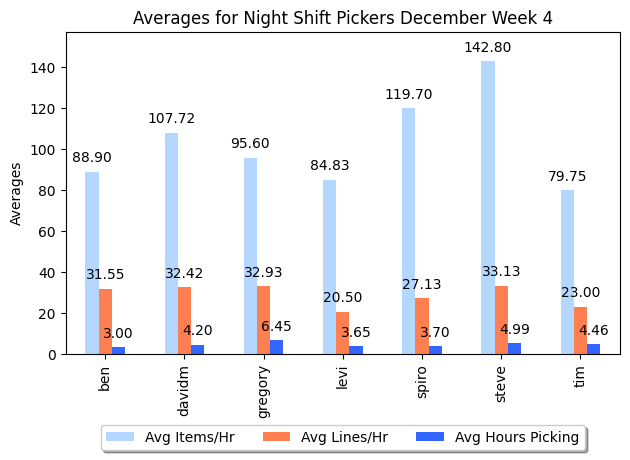

<Figure size 1000x600 with 0 Axes>

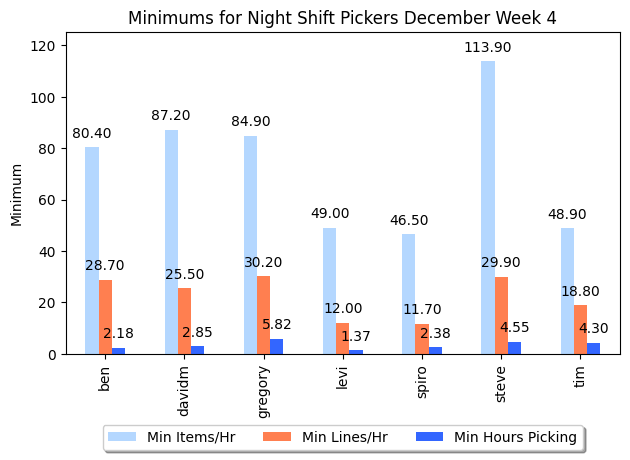

<Figure size 1000x600 with 0 Axes>

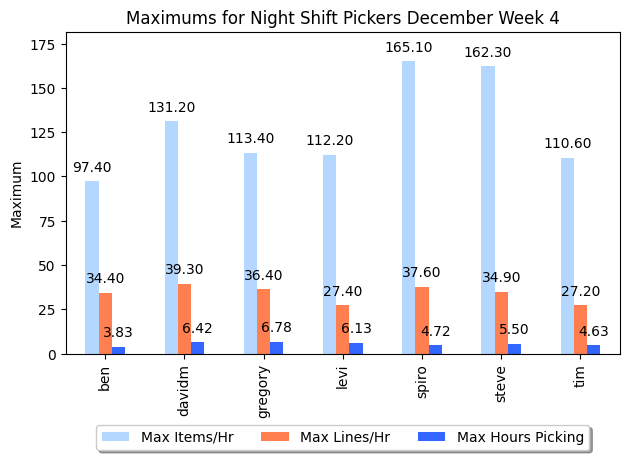

In [17]:
#create a dataframe with the averages 

data_averages = {
    'Avg Items/Hr': avg_items_per_hour,
    'Avg Lines/Hr': avg_lines_per_hour,
    'Avg Hours Picking': avg_hours_picking
}

# Creating a DataFrame from the calculated averages
df = pd.DataFrame(data_averages)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Averages')
plt.title('Averages for Night Shift Pickers December Week 4')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()



#create a dataframe with the minimum

data_minimum = {
    'Min Items/Hr': min_items_per_hour,
    'Min Lines/Hr': min_lines_per_hour,
    'Min Hours Picking': min_hours_picking
}

# Creating a DataFrame from the calculated averages
df_min = pd.DataFrame(data_minimum)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_min.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Minimum')
plt.title('Minimums for Night Shift Pickers December Week 4')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the maximum

data_maximum = {
    'Max Items/Hr': max_items_per_hour,
    'Max Lines/Hr': max_lines_per_hour,
    'Max Hours Picking': max_hours_picking
}

# Creating a DataFrame from the calculated averages
df_max= pd.DataFrame(data_maximum)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_max.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Maximum')
plt.title('Maximums for Night Shift Pickers December Week 4')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()



In [18]:
# Specify the file path where you want to save the CSV file
file_path_averages = 'NSdata_averagesWk4.csv'

# Export the DataFrame to a CSV file
df.to_csv(file_path_averages)

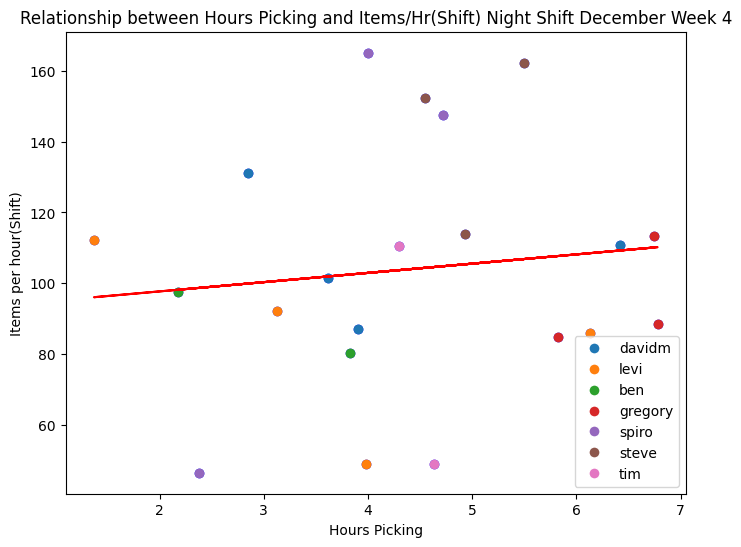

In [19]:
user_names = filtered_data_Nights['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Nights['Hours_Picking'], filtered_data_Nights['Items/hr(Shift)'], color='blue')

x = filtered_data_Nights['Hours_Picking']
y = filtered_data_Nights['Items/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users = user_names.unique()
user_lines = {}


for user in unique_users:
    user_data = filtered_data_Nights[user_names == user]
    plt.scatter(user_data['Hours_Picking'], user_data['Items/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users)]
plt.legend(handles=legend_elements, loc='lower right')




plt.xlabel('Hours Picking')
plt.ylabel('Items per hour(Shift)')
plt.title('Relationship between Hours Picking and Items/Hr(Shift) Night Shift December Week 4')
plt.show()

/tmp/ipykernel_810/944466983.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Lines/Hr'][i], df_avg.index[i], fontsize=8)


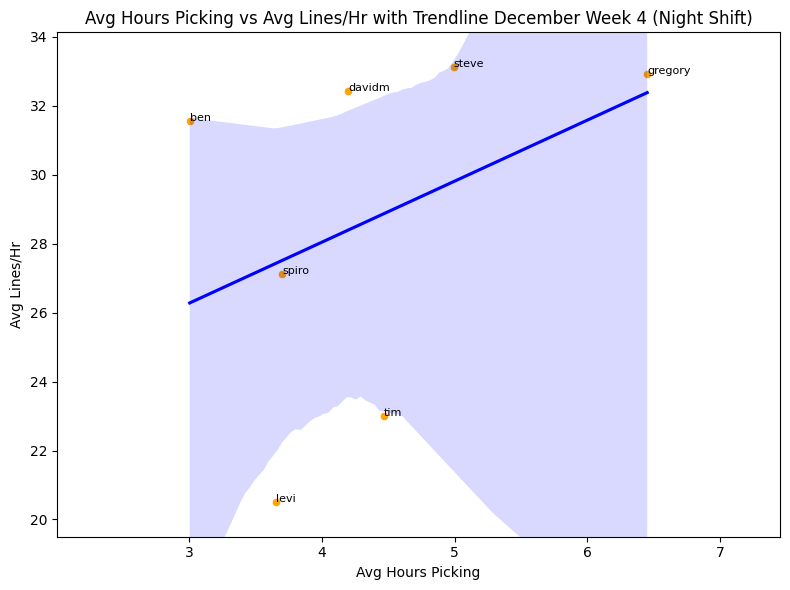

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_avg = pd.DataFrame(data_averages)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_avg)):
    plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Lines/Hr'][i], df_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_avg['Avg Hours Picking'].min() - 1, df_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_avg['Avg Lines/Hr'].min() - 1, df_avg['Avg Lines/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Lines/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 4 (Night Shift)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_810/861147399.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Items/Hr'][i], df_avg.index[i], fontsize=8)


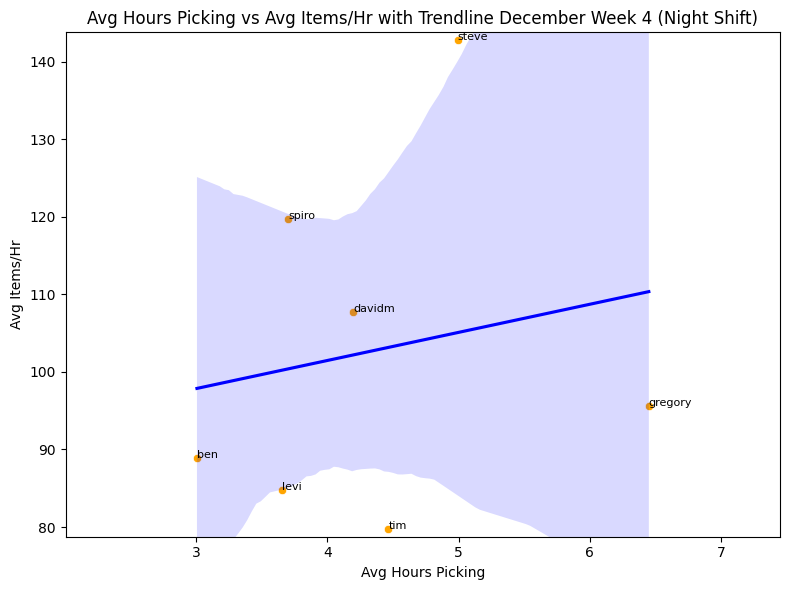

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_avg = pd.DataFrame(data_averages)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_avg)):
    plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Items/Hr'][i], df_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_avg['Avg Hours Picking'].min() - 1, df_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_avg['Avg Items/Hr'].min() - 1, df_avg['Avg Items/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Items/Hr')
plt.title('Avg Hours Picking vs Avg Items/Hr with Trendline December Week 4 (Night Shift)')
plt.tight_layout()
plt.show()


### DAY SHIFT ### 

In [24]:
Day_shift = ['Troy', 'damir', 'jessek','justin','kane', 'lachlyn','owenl','simonb','richie']
desired_days = [1,2,3,4,5,6]

In [25]:
filtered_data_Day = DecWk4_Data[
    (DecWk4_Data['user_name'].isin(Day_shift))&
    (DecWk4_Data['Day_of_Week'].isin(desired_days))]

In [27]:
table_view_Start = filtered_data_Day.pivot_table(index='user_name', columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')
table_view_Start = table_view_Start.fillna(0)
table_view_Start = table_view_Start.rename(columns={1: 'Mon 25th', 2: 'Tues 26th', 3: 'Wed 27th', 4: 'Thurs 28th', 5: 'Fri 29th'})

# Adding titles for index and columns
table_view_Start = table_view_Start.rename_axis('Users Start Time', axis='index')
table_view_Start = table_view_Start.rename_axis('Days', axis='columns')

print(table_view_Start)

table_view_End = filtered_data_Day.pivot_table(index='user_name', columns='Day_of_Week', values='Last_Pick_Completed', aggfunc='min')
table_view_End = table_view_End.fillna(0)
table_view_End = table_view_End.rename(columns={1: 'Mon 25th', 2: 'Tues 26th', 3: 'Wed 27th', 4: 'Thurs 28th', 5: 'Fri 29th'})


# Adding titles for index and columns
table_view_End = table_view_End.rename_axis('Users End Time', axis='index')
table_view_End = table_view_End.rename_axis('Days', axis='columns')

print(table_view_End)

Days              Mon 25th Tues 26th Wed 27th Thurs 28th Fri 29th
Users Start Time                                                 
Troy                     0         0        0    8:17 AM  8:10 AM
damir                    0   8:07 AM  8:25 AM    8:17 AM  8:08 AM
jessek                   0         0        0          0  6:53 AM
justin            12:20 AM   6:17 PM  6:19 PM    6:26 PM        0
kane                     0         0  7:00 AM    7:00 AM  7:04 AM
lachlyn                  0         0  8:37 AM          0  8:50 AM
richie                   0         0        0    4:42 AM  6:53 AM
Days           Mon 25th Tues 26th Wed 27th Thurs 28th  Fri 29th
Users End Time                                                 
Troy                  0         0        0    3:35 PM   3:25 PM
damir                 0  11:23 AM  2:47 PM   12:50 PM   2:30 PM
jessek                0         0        0          0   7:06 AM
justin          5:30 AM   1:35 AM  1:56 AM    1:49 AM         0
kane                  

In [28]:
avg_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].mean()
avg_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].mean()
avg_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].mean()

#print(avg_items_per_hour_day)
#print(avg_lines_per_hour_day)
#print(avg_hours_picking_day)


min_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].min()
min_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].min()
min_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].min()

#print(min_items_per_hour_day)
#print(min_lines_per_hour_day)
#print(min_hours_picking_day)

max_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].max()
max_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].max()
max_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].max()

#print(max_items_per_hour_day)
#print(max_lines_per_hour_day)
#print(max_hours_picking_day)


In [29]:
Day_Stats = {
    'Avg Items/Hr': avg_items_per_hour_day,
    'Avg Lines/Hr': avg_lines_per_hour_day,
    'Avg Hours Picking': avg_hours_picking_day,
    'Min Items/Hr':min_items_per_hour_day,
    'Min Lines/Hr':min_lines_per_hour_day,
    'Min Hours Picking':min_hours_picking_day,
    'Max Items/Hr':max_items_per_hour_day,
    'Max Lines/Hr':max_lines_per_hour_day,
    'Max Hours Picking':max_hours_picking_day
}

df_day_stats = pd.DataFrame(Day_Stats)
# Specify the file path where you want to save the CSV file
file_path_Day_Stats = 'Day_Stats_Wk4.csv'

# Export the DataFrame to a CSV file
df_day_stats.to_csv(file_path_Day_Stats)

<Figure size 1000x600 with 0 Axes>

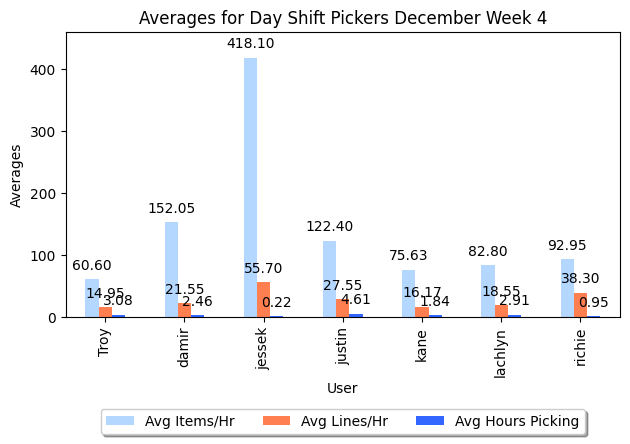

<Figure size 1000x600 with 0 Axes>

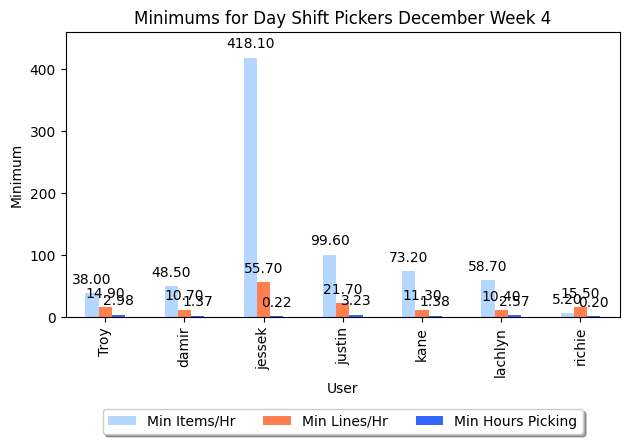

<Figure size 1000x600 with 0 Axes>

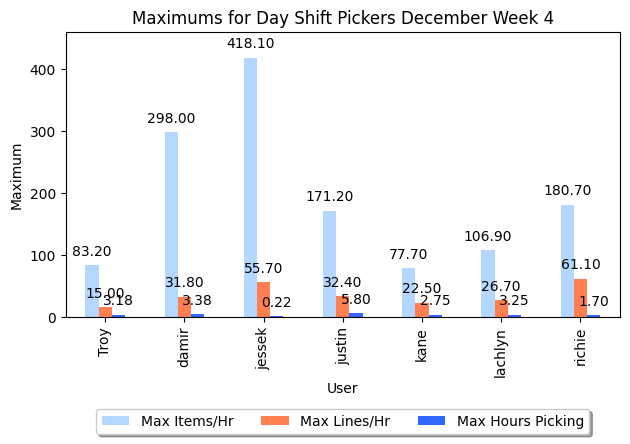

In [37]:
#create a dataframe with the averages 

data_averages_day = {
    'Avg Items/Hr': avg_items_per_hour_day,
    'Avg Lines/Hr': avg_lines_per_hour_day,
    'Avg Hours Picking': avg_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_day = pd.DataFrame(data_averages_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Averages')
plt.title('Averages for Day Shift Pickers December Week 4')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the minimum

data_minimum_day = {
    'Min Items/Hr': min_items_per_hour_day,
    'Min Lines/Hr': min_lines_per_hour_day,
    'Min Hours Picking': min_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_min_day = pd.DataFrame(data_minimum_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_min_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Minimum')
plt.title('Minimums for Day Shift Pickers December Week 4')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the maximum

data_maximum_day = {
    'Max Items/Hr': max_items_per_hour_day,
    'Max Lines/Hr': max_lines_per_hour_day,
    'Max Hours Picking': max_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_max_day= pd.DataFrame(data_maximum_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_max_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Maximum')
plt.title('Maximums for Day Shift Pickers December Week 4')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()

In [31]:
# Specify the file path where you want to save the CSV file
file_path_averages_day = 'DSdata_averagesWk4.csv'

# Export the DataFrame to a CSV file
df_day.to_csv(file_path_averages_day)

/tmp/ipykernel_810/1548744030.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Items/Hr'][i], df_day_avg.index[i], fontsize=8)


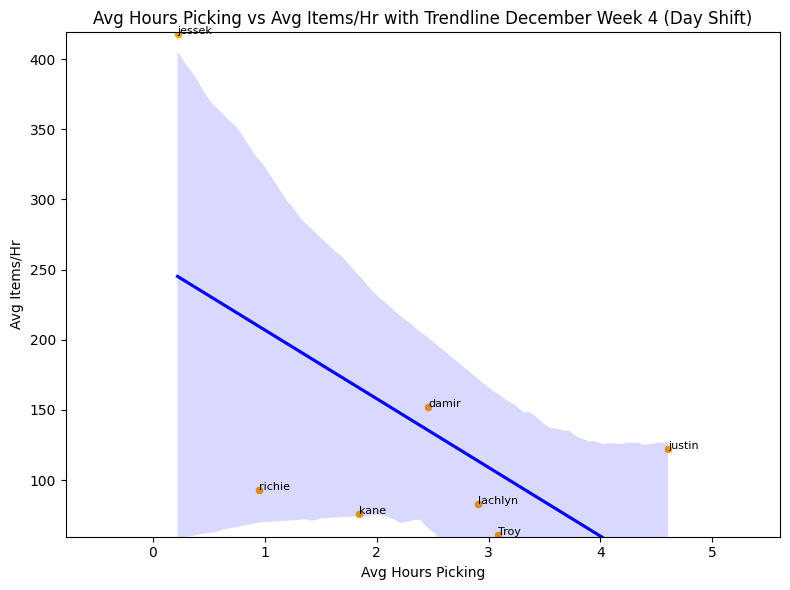

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_day_avg = pd.DataFrame(data_averages_day)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_day_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_day_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_day_avg)):
    plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Items/Hr'][i], df_day_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_day_avg['Avg Hours Picking'].min() - 1, df_day_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_day_avg['Avg Items/Hr'].min() - 1, df_day_avg['Avg Items/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Items/Hr')
plt.title('Avg Hours Picking vs Avg Items/Hr with Trendline December Week 4 (Day Shift)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_810/2874936256.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Lines/Hr'][i], df_day_avg.index[i], fontsize=8)


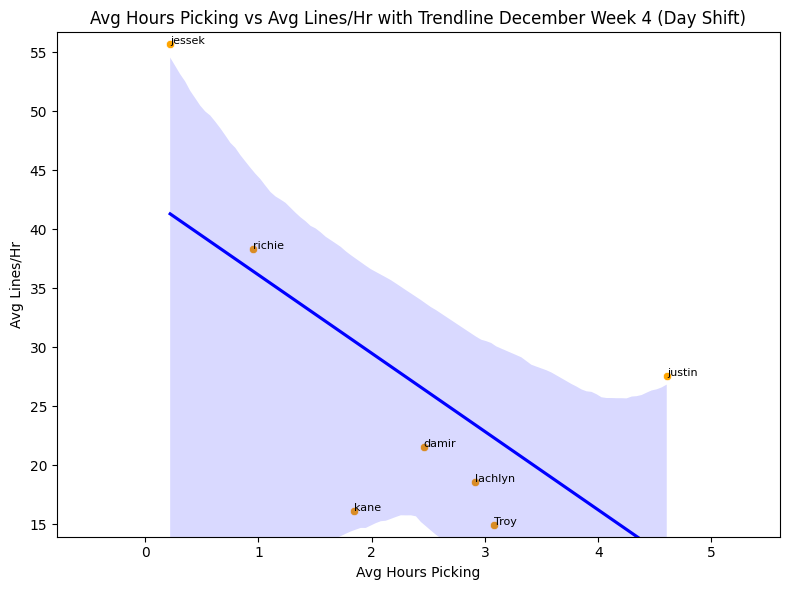

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_day_avg = pd.DataFrame(data_averages_day)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_day_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_day_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_day_avg)):
    plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Lines/Hr'][i], df_day_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_day_avg['Avg Hours Picking'].min() - 1, df_day_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_day_avg['Avg Lines/Hr'].min() - 1, df_day_avg['Avg Lines/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Lines/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 4 (Day Shift)')
plt.tight_layout()
plt.show()
